In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
path = "C:/Users/15878/Documents/PythonScripts/Interview Screening Data_saved.xlsx"
df = pd.read_excel(path)
df.head()

,OPR_DATE,OPR_HOUR,LOCATION,TMP,ACTUAL_DEMAND
0,2017-01-01,1,Calgary,-8.9,9480.0
1,2017-01-01,2,Calgary,-10.0,9326.0
2,2017-01-01,3,Calgary,-10.0,9252.0
3,2017-01-01,4,Calgary,-10.0,9175.0
4,2017-01-01,5,Calgary,-11.1,9125.0


In [3]:
df['LOCATION'].unique()

array(['Calgary'], dtype=object)

In [4]:
df.drop(['LOCATION' ], axis=1, inplace=True)
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND
0,2017-01-01,1,-8.9,9480.0
1,2017-01-01,2,-10.0,9326.0
2,2017-01-01,3,-10.0,9252.0
3,2017-01-01,4,-10.0,9175.0
4,2017-01-01,5,-11.1,9125.0


In [5]:
df.describe()

,OPR_HOUR,TMP,ACTUAL_DEMAND
count,17400.000000,17400.000000,17399.000000
mean,12.500000,4.849879,9584.142077
std,6.922385,11.946525,782.821579
min,1.000000,-30.000000,7600.000000
25%,6.750000,-2.800000,9048.000000
50%,12.500000,5.000000,9589.000000
75%,18.250000,13.900000,10174.500000
max,24.000000,36.100000,11697.000000


In [6]:
 df.isnull().sum(axis = 0)

OPR_DATE         0
OPR_HOUR         0
TMP              0
ACTUAL_DEMAND    1
dtype: int64

In [7]:
df.dtypes

OPR_DATE         datetime64[ns]
OPR_HOUR                  int64
TMP                     float64
ACTUAL_DEMAND           float64
dtype: object

In [8]:
df.dropna(subset=['ACTUAL_DEMAND'],  inplace = True)

In [9]:
df.describe()

,OPR_HOUR,TMP,ACTUAL_DEMAND
count,17399.000000,17399.000000,17399.000000
mean,12.500603,4.850606,9584.142077
std,6.922127,11.946484,782.821579
min,1.000000,-30.000000,7600.000000
25%,7.000000,-2.800000,9048.000000
50%,13.000000,5.000000,9589.000000
75%,18.500000,13.900000,10174.500000
max,24.000000,36.100000,11697.000000


# add new columns

In [10]:
df['WEEKDAY']=df['OPR_DATE'].dt.weekday_name
df.head()
df['WEEKDAY'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [11]:
df['WEEKDAY'].replace(to_replace=['Sunday', 'Saturday'],value= 1,inplace=True)
df['WEEKDAY'].replace(to_replace=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],value= 0,inplace=True)
df['WEEKDAY'].unique()

array([1, 0], dtype=int64)

In [12]:
df['month_year'] = pd.to_datetime(df['OPR_DATE']).dt.to_period('M')
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year
0,2017-01-01,1,-8.9,9480.0,1,2017-01
1,2017-01-01,2,-10.0,9326.0,1,2017-01
2,2017-01-01,3,-10.0,9252.0,1,2017-01
3,2017-01-01,4,-10.0,9175.0,1,2017-01
4,2017-01-01,5,-11.1,9125.0,1,2017-01


In [13]:
df['month']=pd.DatetimeIndex(df['OPR_DATE']).month
 

In [14]:
df.corr()

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month
OPR_HOUR,1.000000,0.150213,0.424348,0.000138,-0.000089
TMP,0.150213,1.000000,-0.337184,-0.008819,0.188826
ACTUAL_DEMAND,0.424348,-0.337184,1.000000,-0.179345,-0.007804
WEEKDAY,0.000138,-0.008819,-0.179345,1.000000,0.010754
month,-0.000089,0.188826,-0.007804,0.010754,1.000000


Skew is: -0.09088723084751026

 mu = 9584.14 and sigma = 782.80



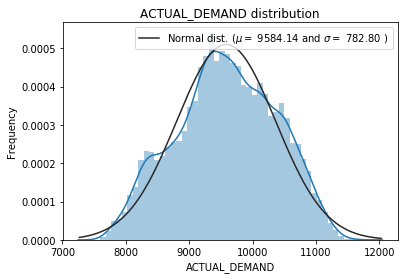

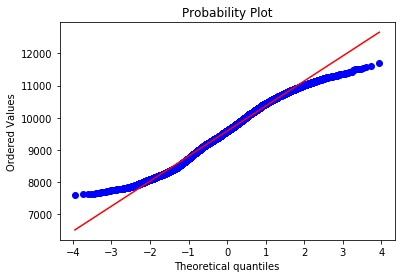

In [15]:
sns.distplot(df['ACTUAL_DEMAND'] , fit=norm );
print ("Skew is:", df.ACTUAL_DEMAND.skew())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['ACTUAL_DEMAND'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ACTUAL_DEMAND distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['ACTUAL_DEMAND'], plot=plt)
plt.show()

In [16]:
df_original=df.copy()
df_original.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month
0,2017-01-01,1,-8.9,9480.0,1,2017-01,1
1,2017-01-01,2,-10.0,9326.0,1,2017-01,1
2,2017-01-01,3,-10.0,9252.0,1,2017-01,1
3,2017-01-01,4,-10.0,9175.0,1,2017-01,1
4,2017-01-01,5,-11.1,9125.0,1,2017-01,1


# without normolization


In [17]:
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month
0,2017-01-01,1,-8.9,9480.0,1,2017-01,1
1,2017-01-01,2,-10.0,9326.0,1,2017-01,1
2,2017-01-01,3,-10.0,9252.0,1,2017-01,1
3,2017-01-01,4,-10.0,9175.0,1,2017-01,1
4,2017-01-01,5,-11.1,9125.0,1,2017-01,1


In [18]:
dftest=df[(df.month_year=='2018-07')   ]
dftest.shape

(744, 7)

In [19]:
dftrain=df[(df.month_year!='2018-07')   ]
dftrain.shape

(16655, 7)

In [20]:
trainX=dftrain[['OPR_HOUR','TMP','WEEKDAY','month']]
trainY=dftrain['ACTUAL_DEMAND']
testX=dftest[['OPR_HOUR','TMP','WEEKDAY','month']]
testY=dftest['ACTUAL_DEMAND']

In [21]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [22]:
model = lr.fit( trainX,  trainY)
model.feature_importances_

array([0.42771867, 0.3138234 , 0.03781135, 0.22064657])

In [23]:
print ("train data R^2 is: \n", model.score(trainX, trainY))

train data R^2 is: 
 0.8996954308986289


In [24]:
print ("test data of R^2 is: \n", model.score(testX, testY))

test data of R^2 is: 
 0.7634558864021559


In [25]:
predictions = model.predict(testX)
 

In [26]:
from sklearn.metrics import mean_squared_error
print ('MSE is: \n', mean_squared_error( testY, predictions))

MSE is: 
 127732.45581568677


In [27]:
dftest=dftest.copy()
dftest['predictions']=predictions

In [28]:
dftest.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,predictions
12984,2018-07-01,1,12.2,8589.0,1,2018-07,7,8492.320486
12985,2018-07-01,2,12.2,8426.0,1,2018-07,7,8373.703159
12986,2018-07-01,3,10.0,8321.0,1,2018-07,7,8294.491678
12987,2018-07-01,4,10.0,8311.0,1,2018-07,7,8264.147145
12988,2018-07-01,5,10.0,8294.0,1,2018-07,7,8264.147145


Text(0.5, 1.0, 'Linear Regression Model')

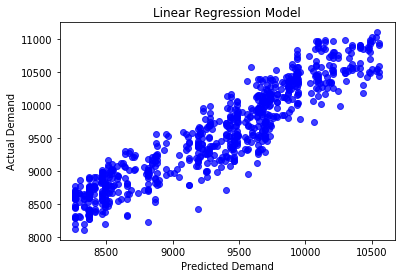

In [29]:
actual_values =  testY
 
plt.scatter(predictions,  actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Demand')
plt.ylabel('Actual Demand')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

In [33]:
submission1=dftest.groupby(['OPR_DATE']).mean()
 
submission1['error']=(submission1['predictions']-submission1['ACTUAL_DEMAND'])/submission1['ACTUAL_DEMAND']
 

submission1.to_csv(r'C:\Users\15878\Documents\prediction_withoutnorm.csv')
submission1.head()

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month,predictions,error
OPR_DATE,,,,,,,
2018-07-01,12.5,14.354167,8774.750000,1.0,7.0,8961.997247,0.021339
2018-07-02,12.5,10.629167,8910.791667,0.0,7.0,9206.262669,0.033159
2018-07-03,12.5,11.025000,9268.708333,0.0,7.0,9207.653206,-0.006587
2018-07-04,12.5,13.841667,9203.500000,0.0,7.0,9239.932845,0.003959
2018-07-05,12.5,18.333333,9496.875000,0.0,7.0,9446.613218,-0.005292


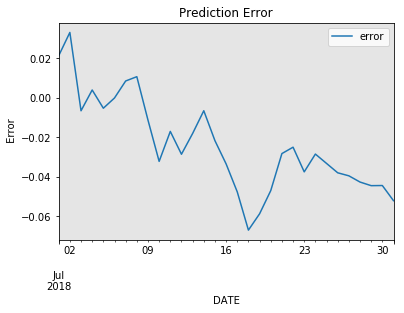

In [34]:
submission1['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

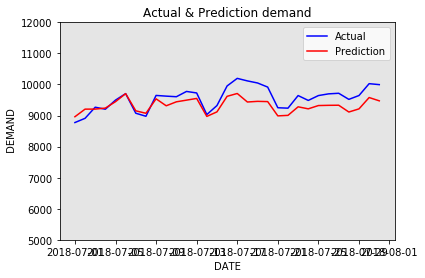

In [35]:
y1=submission1['ACTUAL_DEMAND']
y2=submission1['predictions']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(5000, 12000)
plt.show()
plt.close()

# After data normorlized

In [36]:
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month
0,2017-01-01,1,-8.9,9480.0,1,2017-01,1
1,2017-01-01,2,-10.0,9326.0,1,2017-01,1
2,2017-01-01,3,-10.0,9252.0,1,2017-01,1
3,2017-01-01,4,-10.0,9175.0,1,2017-01,1
4,2017-01-01,5,-11.1,9125.0,1,2017-01,1


In [37]:
def namesuffix(column_names):
  cols = []
  for i in column_names:
      cols.append(i+'1')
  return cols

In [38]:
cols_to_minmax = ['OPR_HOUR','TMP','ACTUAL_DEMAND','month']
df[namesuffix(cols_to_minmax)] = df[cols_to_minmax].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [39]:
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1
0,2017-01-01,1,-8.9,9480.0,1,2017-01,1,0.000000,0.319213,0.458872,0.0
1,2017-01-01,2,-10.0,9326.0,1,2017-01,1,0.043478,0.302572,0.421284,0.0
2,2017-01-01,3,-10.0,9252.0,1,2017-01,1,0.086957,0.302572,0.403222,0.0
3,2017-01-01,4,-10.0,9175.0,1,2017-01,1,0.130435,0.302572,0.384428,0.0
4,2017-01-01,5,-11.1,9125.0,1,2017-01,1,0.173913,0.285930,0.372224,0.0


In [40]:
dftest=df[(df.month_year=='2018-07')   ]
dftest.shape

(744, 11)

In [41]:
dftrain=df[(df.month_year!='2018-07')   ]
dftrain.shape

(16655, 11)

In [42]:
dftrain.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1
0,2017-01-01,1,-8.9,9480.0,1,2017-01,1,0.000000,0.319213,0.458872,0.0
1,2017-01-01,2,-10.0,9326.0,1,2017-01,1,0.043478,0.302572,0.421284,0.0
2,2017-01-01,3,-10.0,9252.0,1,2017-01,1,0.086957,0.302572,0.403222,0.0
3,2017-01-01,4,-10.0,9175.0,1,2017-01,1,0.130435,0.302572,0.384428,0.0
4,2017-01-01,5,-11.1,9125.0,1,2017-01,1,0.173913,0.285930,0.372224,0.0


In [43]:
dftest.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1
12984,2018-07-01,1,12.2,8589.0,1,2018-07,7,0.000000,0.638427,0.241396,0.545455
12985,2018-07-01,2,12.2,8426.0,1,2018-07,7,0.043478,0.638427,0.201611,0.545455
12986,2018-07-01,3,10.0,8321.0,1,2018-07,7,0.086957,0.605144,0.175982,0.545455
12987,2018-07-01,4,10.0,8311.0,1,2018-07,7,0.130435,0.605144,0.173542,0.545455
12988,2018-07-01,5,10.0,8294.0,1,2018-07,7,0.173913,0.605144,0.169392,0.545455


In [44]:
trainX=dftrain[['OPR_HOUR1','TMP1','WEEKDAY','month1']]
trainY=dftrain['ACTUAL_DEMAND1']
testX=dftest[['OPR_HOUR1','TMP1','WEEKDAY','month1']]
testY=dftest['ACTUAL_DEMAND1']

# GradientBoostingRegressor

In [45]:

from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)


In [46]:

model = lr.fit( trainX,  trainY)
model.feature_importances_

array([0.42771867, 0.3138234 , 0.03781135, 0.22064657])

In [47]:
print ("train data R^2 is: \n", model.score(trainX, trainY))

train data R^2 is: 
 0.8996954308986288


In [48]:
print ("test data of R^2 is: \n", model.score(testX, testY))

test data of R^2 is: 
 0.7634558864021558


In [49]:
predictions = model.predict(testX)
 

In [50]:
from sklearn.metrics import mean_squared_error
print ('MSE is: \n', mean_squared_error( testY, predictions))

MSE is: 
 0.007609731512391913


In [51]:
dftest.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1
12984,2018-07-01,1,12.2,8589.0,1,2018-07,7,0.000000,0.638427,0.241396,0.545455
12985,2018-07-01,2,12.2,8426.0,1,2018-07,7,0.043478,0.638427,0.201611,0.545455
12986,2018-07-01,3,10.0,8321.0,1,2018-07,7,0.086957,0.605144,0.175982,0.545455
12987,2018-07-01,4,10.0,8311.0,1,2018-07,7,0.130435,0.605144,0.173542,0.545455
12988,2018-07-01,5,10.0,8294.0,1,2018-07,7,0.173913,0.605144,0.169392,0.545455


In [52]:
dftest=dftest.copy()

In [53]:
dftest['predictions']=predictions

In [54]:
dftest.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1,predictions
12984,2018-07-01,1,12.2,8589.0,1,2018-07,7,0.000000,0.638427,0.241396,0.545455,0.217799
12985,2018-07-01,2,12.2,8426.0,1,2018-07,7,0.043478,0.638427,0.201611,0.545455,0.188846
12986,2018-07-01,3,10.0,8321.0,1,2018-07,7,0.086957,0.605144,0.175982,0.545455,0.169512
12987,2018-07-01,4,10.0,8311.0,1,2018-07,7,0.130435,0.605144,0.173542,0.545455,0.162106
12988,2018-07-01,5,10.0,8294.0,1,2018-07,7,0.173913,0.605144,0.169392,0.545455,0.162106


In [55]:
dftest['real_prediction']=dftest['predictions'] *(dftrain['ACTUAL_DEMAND'].max()-dftrain['ACTUAL_DEMAND'].min())+ dftrain['ACTUAL_DEMAND'].min()

In [56]:
dftest.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1,predictions,real_prediction
12984,2018-07-01,1,12.2,8589.0,1,2018-07,7,0.000000,0.638427,0.241396,0.545455,0.217799,8492.320486
12985,2018-07-01,2,12.2,8426.0,1,2018-07,7,0.043478,0.638427,0.201611,0.545455,0.188846,8373.703159
12986,2018-07-01,3,10.0,8321.0,1,2018-07,7,0.086957,0.605144,0.175982,0.545455,0.169512,8294.491678
12987,2018-07-01,4,10.0,8311.0,1,2018-07,7,0.130435,0.605144,0.173542,0.545455,0.162106,8264.147145
12988,2018-07-01,5,10.0,8294.0,1,2018-07,7,0.173913,0.605144,0.169392,0.545455,0.162106,8264.147145


Text(0.5, 1.0, 'Linear Regression Model')

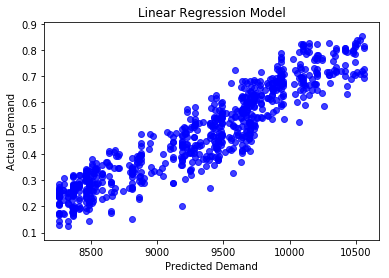

In [57]:
actual_values = testY
predictions=dftest['real_prediction']
 
plt.scatter(predictions,  actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Demand')
plt.ylabel('Actual Demand')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

In [58]:

#submission=dftest[['OPR_DATE','ACTUAL_DEMAND','real_prediction','predictions','ACTUAL_DEMAND1' ]].groupby(['OPR_DATE']).mean()
submission=dftest.groupby(['OPR_DATE']).mean()
submission['error']=(submission['real_prediction']-submission['ACTUAL_DEMAND'])/submission['ACTUAL_DEMAND']
 

submission.to_csv(r'C:\Users\15878\Documents\prediction.csv')
submission.head() 

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month,OPR_HOUR1,TMP1,ACTUAL_DEMAND1,month1,predictions,real_prediction,error
OPR_DATE,,,,,,,,,,,,
2018-07-01,12.5,14.354167,8774.750000,1.0,7.0,0.5,0.671016,0.286734,0.545455,0.332438,8961.997247,0.021339
2018-07-02,12.5,10.629167,8910.791667,0.0,7.0,0.5,0.614662,0.319939,0.545455,0.392058,9206.262669,0.033159
2018-07-03,12.5,11.025000,9268.708333,0.0,7.0,0.5,0.620651,0.407300,0.545455,0.392398,9207.653206,-0.006587
2018-07-04,12.5,13.841667,9203.500000,0.0,7.0,0.5,0.663263,0.391384,0.545455,0.400277,9239.932845,0.003959
2018-07-05,12.5,18.333333,9496.875000,0.0,7.0,0.5,0.731215,0.462991,0.545455,0.450723,9446.613218,-0.005292


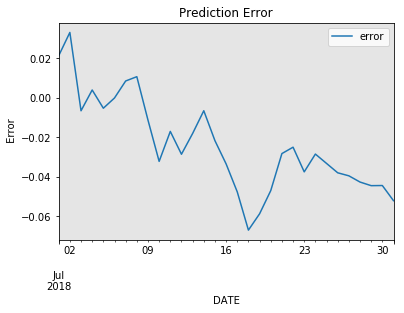

In [59]:
submission['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

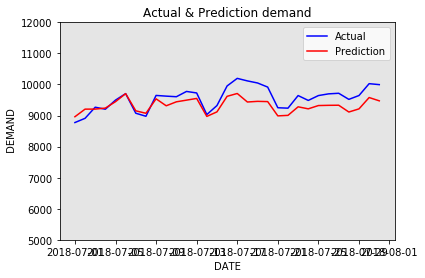

In [60]:
     
y1=submission['ACTUAL_DEMAND']
y2=submission['real_prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(5000, 12000)
plt.show()
plt.close()

# simple polynomia regression


In [61]:
dftrain=df_original[(df.month_year !='2018-07')   ]
#dftrain=dftrain[(dftrain.month >=3) & (dftrain.month <=11)]
dftrain.shape

(16655, 7)

In [62]:
dftest=df_original[(df.month_year =='2018-07')   ]
dftest.shape

(744, 7)

In [63]:
dftrain_end=dftrain[(dftrain.WEEKDAY==1)  ]
dftrain_weekday=dftrain[(dftrain.WEEKDAY==0) ]
dftest_end=dftest[(dftest.WEEKDAY==1)  ]
dftest_weekday=dftest[(dftest.WEEKDAY==0) ]

In [64]:
x_train_w = dftrain_weekday['TMP']
y_train_w = dftrain_weekday['ACTUAL_DEMAND']
x_test_w=dftest_weekday['TMP']
y_test_w=dftest_weekday['ACTUAL_DEMAND']

In [65]:
x_train_e = dftrain_end['TMP']
y_train_e = dftrain_end['ACTUAL_DEMAND']
x_test_e=dftest_end['TMP']
y_test_e=dftest_end['ACTUAL_DEMAND']

In [66]:
f = np.polyfit(x_train_w, y_train_w, 5)
p = np.poly1d(f)
print(p)


            5             4          3          2
-7.993e-05 x + 0.0007473 x + 0.1456 x + 0.4472 x - 68.99 x + 9690


In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(-30, 35, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for ACTUAL DEMAND ~ TMP')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('TMP')
    plt.ylabel('ACTUAL_DEMAND')

    plt.show()
    plt.close()

In [68]:
dftest_weekday=dftest_weekday.copy()
p(x_test_w)
dftest_weekday['prediction']=p(x_test_w)
dftest_weekday.head()


,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,prediction
13008,2018-07-02,1,11.1,8545.0,0,2018-07,7,9176.133324
13009,2018-07-02,2,8.9,8419.0,0,2018-07,7,9214.139362
13010,2018-07-02,3,8.9,8312.0,0,2018-07,7,9214.139362
13011,2018-07-02,4,8.9,8277.0,0,2018-07,7,9214.139362
13012,2018-07-02,5,8.9,8265.0,0,2018-07,7,9214.139362


In [69]:
submission1=dftest_weekday.groupby(['OPR_DATE']).mean()
submission1.head()
submission1['error']=(submission1['prediction']-submission1['ACTUAL_DEMAND'])/submission1['ACTUAL_DEMAND']
 
submission1.head()
submission1.to_csv(r'C:\Users\15878\Documents\prediction_seperated.csv')


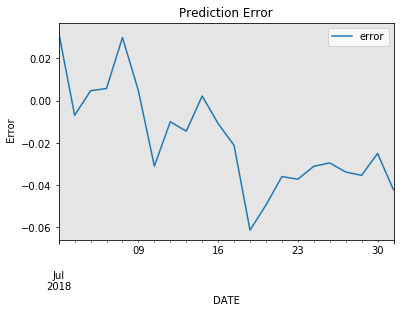

In [70]:
submission1['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

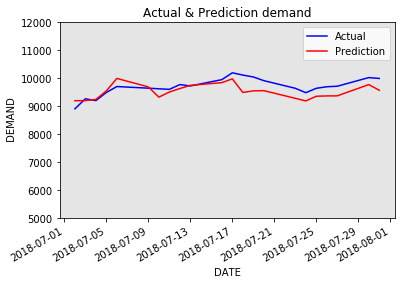

In [71]:
y1=submission1['ACTUAL_DEMAND']
y2=submission1['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(5000, 12000)
fig.autofmt_xdate()
plt.show()
plt.close()


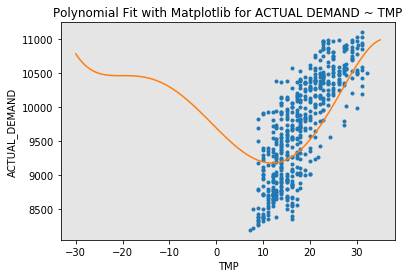

In [72]:
PlotPolly(p, x_test_w, y_test_w, 'TMP-demand')

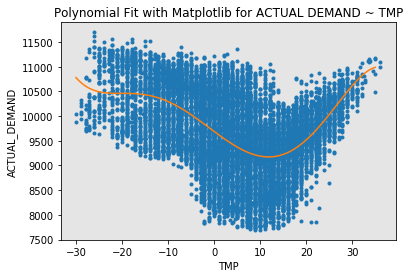

In [73]:
PlotPolly(p, x_train_w, y_train_w, 'TMP-demand')

# for weekend


In [74]:
f = np.polyfit(x_train_e, y_train_e, 5)
p = np.poly1d(f)
print(p)  


            5            4          3             2
-0.0001009 x + 0.001291 x + 0.1537 x + 0.0001391 x - 71.31 x + 9447


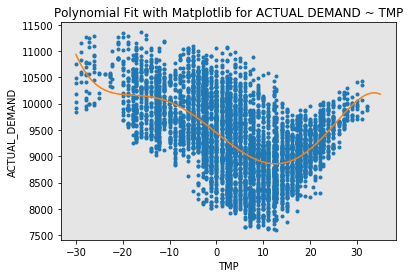

In [75]:
PlotPolly(p, x_train_e, y_train_e, 'TMP-demand')

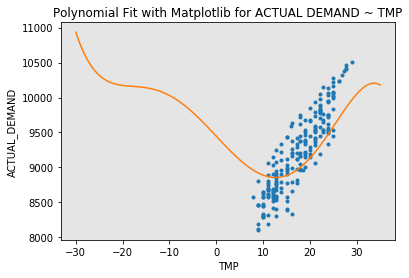

In [76]:
PlotPolly(p, x_test_e, y_test_e, 'TMP-demand')

In [77]:
p(x_test_e)
dftest_end=dftest_end.copy()
dftest_end['prediction']=p(x_test_e)
dftest_end.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,prediction
12984,2018-07-01,1,12.2,8589.0,1,2018-07,7,8857.217183
12985,2018-07-01,2,12.2,8426.0,1,2018-07,7,8857.217183
12986,2018-07-01,3,10.0,8321.0,1,2018-07,7,8890.196799
12987,2018-07-01,4,10.0,8311.0,1,2018-07,7,8890.196799
12988,2018-07-01,5,10.0,8294.0,1,2018-07,7,8890.196799


In [78]:
submission2=dftest_end.groupby(['OPR_DATE']).mean()
submission2.head()
submission2['error']=(submission2['prediction']-submission2['ACTUAL_DEMAND'])/submission2['ACTUAL_DEMAND']
 
submission2.head(20)
#submission2.to_csv(r'C:\Users\15878\Documents\prediction_seperated_weekend.csv')

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,,
2018-07-01,12.5,14.354167,8774.750000,1.0,7.0,8934.868961,0.018248
2018-07-07,12.5,19.916667,9074.541667,1.0,7.0,9181.846825,0.011825
2018-07-08,12.5,17.229167,8976.666667,1.0,7.0,9095.611696,0.013250
2018-07-14,12.5,14.675000,9031.750000,1.0,7.0,8973.891373,-0.006406
2018-07-15,12.5,18.312500,9321.375000,1.0,7.0,9180.663131,-0.015096
2018-07-21,12.5,15.645833,9251.375000,1.0,7.0,8989.530994,-0.028303
2018-07-22,12.5,16.612500,9237.500000,1.0,7.0,9010.424969,-0.024582
2018-07-28,12.5,18.404167,9520.916667,1.0,7.0,9170.009947,-0.036856
2018-07-29,12.5,20.770833,9644.833333,1.0,7.0,9326.064773,-0.033051


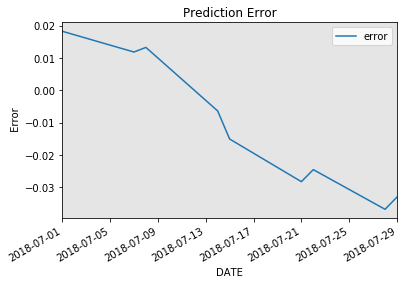

In [79]:
submission2['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

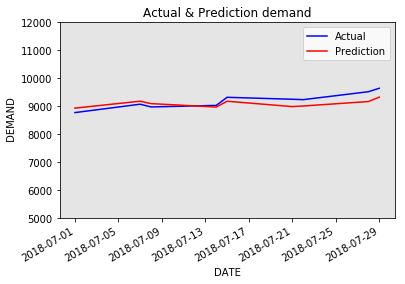

In [80]:
y1=submission2['ACTUAL_DEMAND']
y2=submission2['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(5000, 12000)
fig.autofmt_xdate()
plt.show()
plt.close()

In [81]:
submission1.head()

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,,
2018-07-02,12.5,10.629167,8910.791667,0.0,7.0,9198.754791,0.032316
2018-07-03,12.5,11.025000,9268.708333,0.0,7.0,9204.389544,-0.006939
2018-07-04,12.5,13.841667,9203.500000,0.0,7.0,9246.735200,0.004698
2018-07-05,12.5,18.333333,9496.875000,0.0,7.0,9551.659313,0.005769
2018-07-06,12.5,23.991667,9706.125000,0.0,7.0,9996.613352,0.029928


In [82]:
submission2.head()

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,,
2018-07-01,12.5,14.354167,8774.750000,1.0,7.0,8934.868961,0.018248
2018-07-07,12.5,19.916667,9074.541667,1.0,7.0,9181.846825,0.011825
2018-07-08,12.5,17.229167,8976.666667,1.0,7.0,9095.611696,0.013250
2018-07-14,12.5,14.675000,9031.750000,1.0,7.0,8973.891373,-0.006406
2018-07-15,12.5,18.312500,9321.375000,1.0,7.0,9180.663131,-0.015096


In [83]:
submission_final = submission1.append(submission2 )
#submission_final.head(31)
submission_final=submission_final.sort_values(by=['OPR_DATE'])
submission_final.head(5)

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,,
2018-07-01,12.5,14.354167,8774.750000,1.0,7.0,8934.868961,0.018248
2018-07-02,12.5,10.629167,8910.791667,0.0,7.0,9198.754791,0.032316
2018-07-03,12.5,11.025000,9268.708333,0.0,7.0,9204.389544,-0.006939
2018-07-04,12.5,13.841667,9203.500000,0.0,7.0,9246.735200,0.004698
2018-07-05,12.5,18.333333,9496.875000,0.0,7.0,9551.659313,0.005769


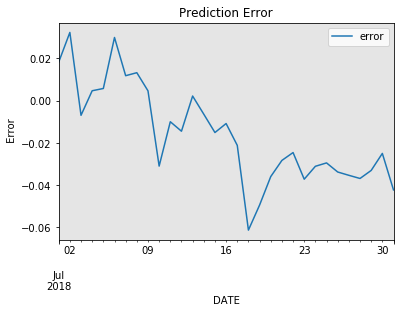

In [84]:
submission_final['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

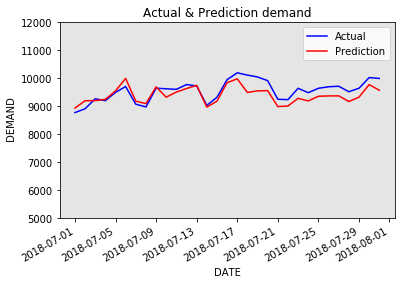

In [85]:
y1=submission_final['ACTUAL_DEMAND']
y2=submission_final['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(5000, 12000)
fig.autofmt_xdate()
plt.show()
plt.close()

In [86]:
submission_final.to_csv(r'C:\Users\15878\Documents\prediction_seperated_final.csv')